# A Tutorial on HashMap

(In addition to having fun) We write programs to solve real world problems. Data structures help us in representing and efficiently manipulating the data associated with these problems. 

Let us see if we can use any of the data structures that we already know to solve the following problem

### The Problem Scenario

In a class of students, store heights for each student.

The problem in itself is very simple. We have the data of heights of each student. We want to store it so that next time someone asks for height of a student, we can easily return the value. But how can we store these heights?

Obviously we can use a database and store these values. But, let's say we don't want to do that for now. We want to use a data structure to store these values as part of our program. For the sake of simplicity, our problem is limited to storing heights of students. But you can certainly imagine scenarios where you have to store such `key-value` pairs and later on when someone gives you a `key`, you can efficiently return the corrresponding `value`.

The class diagram for HashMaps would look something like this.

In [ ]:
class HashMap:
    
    def __init__(self):
        self.num_entries = 0
    
    def put(self, key, value):
        pass
    
    def get(self, key):
        pass
    
    def size(self):
        return self.num_entries

### Arrays

Can we use arrays to store `key-value` pairs?

We can certainly use one array to store the names of the students and use another array to store their corresponding heights at the corresponding indices.

What will be the time complexity in this scenario?

To obtain height of a student, say `Potter, Harry`, we will have to traverse the entire array and check if the value at a particular index matches `Potter, Harry`. Once we find the index in which this value is stored, we can use this index to obtain the height from the second array. 

Thus, because of this traveral, complexity for `get()` operation becomes $O(n)$. Even if we maintain a sorted array, the operation will not take less than $O(log(n))$ complexity.

What happens if a student leaves a class? We will have to delete the entry corresponding to the student from both the arrays. 

This would require another traversal to find the index. And then we will have to shift our entire array to fill this gap. Again, the time complexity of operation becomes $O(n)$



### Linked List

Is it possible to use linked lists for this problem?

We can certainly modify our `LinkedListNode` to have two different value attributes - one for name of the student and the other for height. 

But we again face the same problem. In the worst case, we will have to traverse the entire linked list to find the height of a particular student. Once again, the cost of operation becomes $O(n)$.

### Stacks and Queues

Stacks and Queues are LIFO and FIFO data structures respectively. Can you think why they too do not make a good choice for storing `key-value` pairs?

------------------------------------------------------------------------

Can we do better? Can you think of any data structure that allows for fast `get()` operation?


Let us circle back to arrays. 

When we obtain the element present at a particular index using something like `arr[3]`, the operation takes constant i.e. `O(1)` time. 

*For review - Does this constant time operation require further explanation?*



If we think about `array indices as keys` and the `element present at those indices as values`, we can fairly conclude that at least for non-zero integer `keys`, we can use arrays.  

However, like our current problem statement, we may not always have integer keys.

`If only we had a function that could give us arrays indices for any key value that we gave it!`

## Hash Functions

Simply put, hash functions are these really incredible `magic` functions which can map data of any size to a fixed size data. This fixed sized data is often called hash code or hash digest. 

Let's create our own hash function to store strings

In [1]:
def hash_function(string):
    pass

For a given string, say `abcd`, a very simple hash function can be sum of corresponding ASCII values. 

*Note: you can use `ord(character`) to determine ASCII value of a particular character e.g. `ord('a') will return 97`*


In [2]:
def hash_function(string):
    hash_code = 0
    for character in string:
        hash_code += ord(character)
    return hash_code
    

In [3]:
hash_code_1 = hash_function("abcd")
print(hash_code_1)

394


Looks like our hash function is working fine. But is this really a good hash function?

For starters, it will return the same value for `abcd` and `bcda`. Do we want that? We can create 24 different permutations for the string `abcd` and each will have the same value. We cannot put 24 values to one index. 

Obviously, this makes it clear that our hash function must return unique values for unique objects. 

When two different inputs produce the same output, then we have something called a `collision`. An ideal hash function must be immune from producing collisions.  

Let's think something else.

Can product help? We will again run in the same problem. 

The honest answer is that we have differernt hash functions for different types of keys. The hash function for integers will be different from the hash function for strings, which again, will be different for some object of a class that you created. 

However, let's try to continue with our problem and try to come up with a hash function for strings.

## Hash Function for Strings

For a string, say `abcde`, a very effective function is treating this as number of prime number base `p`. 
Let's elaborate this statement. 

For a number, say `578`, we can represent this number in base 10 number system as $$5*10^2 + 7*10^1 + 8*10^0$$

Similarly, we can treat `abcde` in base `p` as $$a * p^4 + b * p^3 + c * p^2 + d * p^1 + e * p^0$$

Here, we replace each character with its corresponding ASCII value. 

A lot of research goes into figuring out good hash functions and this hash function is one of the most popular functions used for strings. We use prime numbers because the provide a good distribution. The most common prime numbers used for this function are 31 and 37.

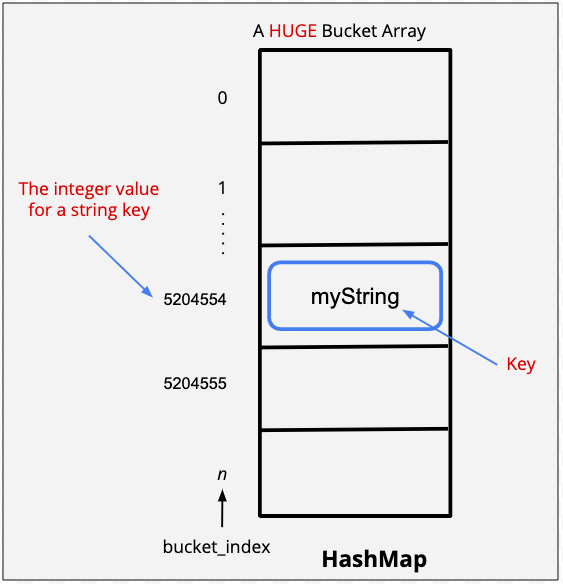

In [15]:
# No compression, so the bucket_array would get way too big.
# But, no collision, for example with "one" and "neo", they produce different hash values.
class HashMapOrig:
    
    def __init__(self, initial_size=10):
        self.bucket_array = [None for _ in range(initial_size)]
        self.p = 37                  # a prime numbers 
        self.num_entries = 0
        
    def put(self, key, value):
        pass
    
    def get(self, key):
        pass
    
    # Returns the bucket_index
    def get_bucket_index(self, key):
        return self.get_hash_code(key)  # The returned hash code will be the bucket_index
    
    
    # Returns the hash code
    def get_hash_code(self, key):
        key = str(key)
        
        # represents (self.p^0) which is 1
        current_coefficient = 1         
        
        hash_code = 0
        
        for character in key:
            print(character, ":", ord(character), " * ", current_coefficient)
            hash_code += ord(character) * current_coefficient
            current_coefficient *= self.p

        return hash_code                # The generated hash code will be the bucket_index

        

In [16]:
hash_map = HashMapOrig()

bucket_index = hash_map.get_bucket_index("abcd")
print(bucket_index)
print("37**2 =", 37**2)
print("37**3 =", 37**3)

a : 97  *  1
b : 98  *  37
c : 99  *  1369
d : 100  *  50653
5204554
37**2 = 1369
37**3 = 50653


In [18]:
hash_map = HashMapOrig()

bucket_index = hash_map.get_bucket_index("bcda")
print(bucket_index)

b : 98  *  1
c : 99  *  37
d : 100  *  1369
a : 97  *  50653
5054002


In [19]:
# No compression in the hash function, but no collision here in the resulting hash values.
hash_map = HashMapOrig()

print(hash_map.get_bucket_index("one"))
print(hash_map.get_bucket_index("neo"))

o : 111  *  1
n : 110  *  37
e : 101  *  1369
142450
n : 110  *  1
e : 101  *  37
o : 111  *  1369
155806


In [14]:
print("Example: 10 mod 4.  10 divided by 4 equals 2 with remainder 2.")
print(10 % 4)
print("Next example: 4 mod 10.  4 divided by 10 equals 0 with remainder 4.")
print(4 % 10)
print("Next example: 4 mod 5. 4 divided by 5 equals 0 with remainder 4.")
print(4 % 5)

Example: 10 mod 4.  10 divided by 4 equals 2 with remainder 2.
2
Next example: 4 mod 10.  4 divided by 10 equals 0 with remainder 4.
4
Next example: 4 mod 5. 4 divided by 5 equals 0 with remainder 4.
4


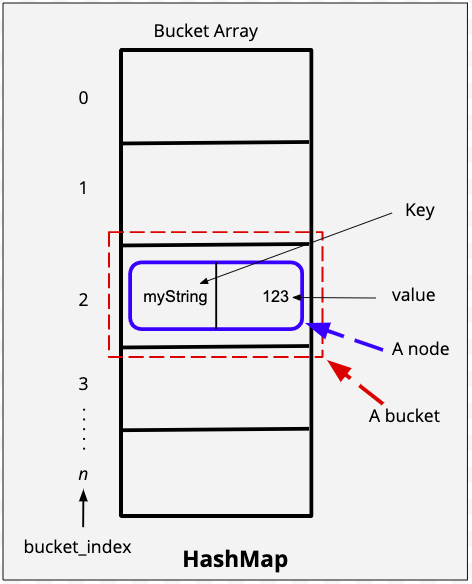

In [20]:
class HashMap:
    
    def __init__(self, initial_size = 10):
        self.bucket_array = [None for _ in range(initial_size)]
        self.p = 31
        self.num_entries = 0
        
    def put(self, key, value):
        pass
    
    def get(self, key):
        pass
        
    def get_bucket_index(self, key):
        bucket_index = self.get_hash_code(key)                        # The returned hash code will be the bucket_index
        return bucket_index
    
    def get_hash_code(self, key):
        key = str(key)
        num_buckets = len(self.bucket_array)                          # length of array to be used in Mod operation
        
        current_coefficient = 1                                       # represents (self.p^0) which is 1
        
        hash_code = 0
        
        for character in key:
            hash_code += ord(character) * current_coefficient
            hash_code = hash_code % num_buckets                       # compress hash_code (Mod operation)
            current_coefficient *= self.p
            current_coefficient = current_coefficient % num_buckets   # compress coefficient as well

        return hash_code % num_buckets                                # one last compression before returning
    
    
    def size(self):
        return self.num_entries


In [21]:
# Check the bucket_index for two different strings made with same set of characters
hash_map = HashMap()

bucket_index = hash_map.get_bucket_index("one")
print(bucket_index)

bucket_index = hash_map.get_bucket_index("neo")
print(bucket_index)                                  # Collision might occur

2
2


## Collision Handling

As discussed earlier, when two different inputs produce the same output, then we have a collision. Our implementation of `get_hash_code()` function is satisfactory. However, because we are using compression function, we are prone to collisions. **Remember, that a key will always be unique. But the bucket_index generated by two different keys can be the same.** 

**Consider the following scenario** - We have a bucket array of length 10 and we get two different hash codes for two different inputs, say 355, and 1095. Even though the hash codes are different in this case, the bucket index will be same because of the way we have implemented our compression function. Such scenarios where multiple entries want to go to the same bucket are very common. So, we introduce some logic to handle collisions.

There are two popular ways in which we handle collisions.

1. **Separate chaining** - Separate chaining is a clever technique where we use the same bucket to store multiple objects. The bucket in this case will store a linked list of key-value pairs. Every bucket has it's own separate chain of linked list nodes.


2. **Open Addressing** - In open addressing, we do the following:
 * If, after getting the bucket index,  the bucket is empty, we store the object in that particular bucket

 * If the bucket is not empty, we find an alternate bucket index by using another function which modifies the current hash code to give a new code. This process of finding an alternate bucket index is called **probing**. A few probing techniques are - linear probing, qudratic probing, or double hashing. 
    

Separate chaining is a simple and effective technique to handle collisions and that is what we discuss here. Let us visualize the new `bucket array` one more time as shown in the figure below:


Let's implement the `put` and `get` function using the idea of separate chaining. 


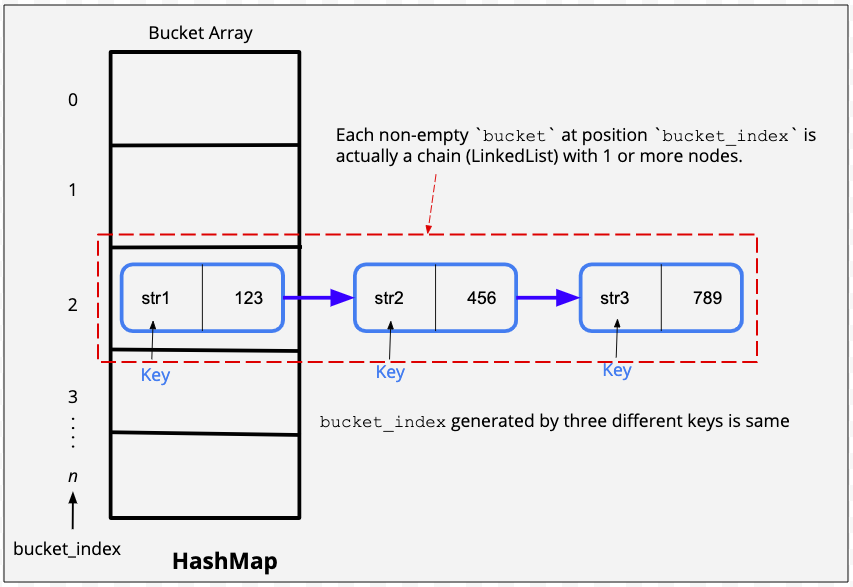

In [22]:
class LinkedListNode:
    
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashMap:
    
    def __init__(self, initial_size = 10):
        self.bucket_array = [None for _ in range(initial_size)]
        self.p = 31
        self.num_entries = 0
    
    '''
    Separate chaining:
    In case of collision, the `put()` function uses the same bucket to store a linked list of key-value pairs. 
    Every bucket will have it's own separate chain of linked list nodes.
    '''  
    def put(self, key, value):                                      # The key is a string, and value is numeric
        bucket_index = self.get_bucket_index(key)   

        new_node = LinkedListNode(key, value)                       # Create a node
        head = self.bucket_array[bucket_index]                      # Create a reference that points to the existing bucket at position bucket_index

        # Check if key is already present in the map, and UPDATE it's value 
        # Remember, a key should always be unique. 
        while head is not None:
            if head.key == key:
                head.value = value
                return
            head = head.next
        
        '''
        If the key is a new one, hence not found in the chain (LinkedList), then following two cases arise:
         1. The key has generated a new bucket_index
         2. The key has generated an existing bucket_index. 
            This event is a Collision, i.e., two different keys have same bucket_index.

        In both the cases, we will prepend the new node (key, value) at the beginning (head) of the chain (LinkedList).
        Remember that each `bucket` at position `bucket_index` is actually a chain (LinkedList) with 1 or more nodes.  
        '''
        head = self.bucket_array[bucket_index]
        new_node.next = head                                         
        self.bucket_array[bucket_index] = new_node                  # Prepend the new node in the beginning of the linked list
        self.num_entries += 1
        
    def get(self, key):
        bucket_index = self.get_bucket_index(key) 
        head = self.bucket_array[bucket_index]
        while head is not None:
            if head.key == key:
                return head.value
            head = head.next
        return None
        
    def get_bucket_index(self, key):
        bucket_index = self.get_hash_code(key)
        return bucket_index
    
    def get_hash_code(self, key):
        key = str(key)
        num_buckets = len(self.bucket_array)
        current_coefficient = 1
        hash_code = 0
        for character in key:
            hash_code += ord(character) * current_coefficient
            hash_code = hash_code % num_buckets                       # compress hash_code
            current_coefficient *= self.p
            current_coefficient = current_coefficient % num_buckets   # compress coefficient

        return hash_code % num_buckets                                # one last compression before returning
    
    def size(self):
        return self.num_entries
    
    # Helper function to see the hashmap
    def __repr__(self):
        output = "\nLet's view the hash map:"

        node = self.bucket_array
        for bucket_index, node in enumerate(self.bucket_array):
            if node is None:
                output += '\n[{}] '.format(bucket_index)
            else:
                output += '\n[{}]'.format(bucket_index)
                while node is not None:
                    output += ' ({} , {}) '.format(node.key, node.value)
                    if node.next is not None:
                        output += ' --> '
                    node = node.next
                    
        return output


In [23]:
# Test the collision resolution technique
hash_map = HashMap()

hash_map.put("one", 1)
hash_map.put("two", 2)
hash_map.put("three", 3)          # Collision: The key "three" will generate the same bucket_index as that of the key "two"
hash_map.put("neo", 11)           # Collision: The key "neo" will generate the same bucket_index as that of the key "one"

print("size: {}".format(hash_map.size()))

print("one: {}".format(hash_map.get("one")))
print("neo: {}".format(hash_map.get("neo")))
print("three: {}".format(hash_map.get("three")))

hash_map                          # call to the helper function to see the hashmap

size: 4
one: 1
neo: 11
three: 3



Let's view the hash map:
[0] 
[1] 
[2] (neo , 11)  -->  (one , 1) 
[3] 
[4] 
[5] 
[6] (three , 3)  -->  (two , 2) 
[7] 
[8] 
[9] 

## Time Complexity and Rehashing

We used arrays to implement our hashmaps because arrays offer $O(1)$ time complexity for both put and get operations. 

*Note: In case of arrays, put is simply `arr[i] = 5` and get is `height = arr[i]`*

#### 1. Put Operation

* In the put operation, we first figure out the bucket index. Calculating the hash code to figure out the bucket index takes some time.

* After that, we go to the bucket index and in the worst case we traverse the linked list to find out if the key is already present or not. This also takes some time.

To analyze the time complexity for any algorithm as a function of the input size `n`, we first have to determine what our input is. In this case, we are putting and getting key-value pairs. So, these entries i.e. key-value pairs are our input. Therefore, our `n` is number of such key-value pair entries.

*Note: time complexity is always determined in terms of input size and not the actual amount of work that is being done independent of input size. That "independent amount of work" will be constant for every input size so we disregard that.*


* In case of our hash function, the computation time for hash code depends on the size of each string. Compared to number of entries (which we always consider to be very high e.g. in the order of $10^5$) the length of each string can be considered to be very small. Also, most of the strings will be around the same size when compared to this high number of entries. Hence, we can ignore the hash computation time in our analysis of time complexity.


* Now, the entire time complexity essentialy depends on the linked list traversal. In the worst case, all entries would go to the same bucket index and our linked list at that index would be huge. Therefore, the time complexity in that scenario would be $O(n)$. However, hash functions are wisely chosen so that this does not happen. 

`On average, the distribution of entries is such that if we have n entries and b buckets, then each bucket does not have more than n/b key-value pair entries.` 

Therefore, because of our choice of hash functions, we can assume that the time complexity is $O(\dfrac{n}{b})$.
This number which determines the `load` on our bucket array `n/b` is known as load factor. 

Generally, we try to keep our load factor around or less than 0.7. This essentially means that if we have a bucket array of size 10, then the number of key-value pair entries will not be more than 7.

**What happens when we get more entries and the value of our load factor crosses 0.7?**

In that scenario, we must increase the size of our bucket array. Also, we must recalculate the bucket index for each entry in the hash map.

*Note: the hash code for each key present in the bucket array would still be the same. However, because of the compression function, the bucket index will change.* 

Therefore, we need to `rehash` all the entries in our hash map. This is known as `Rehashing`.

### 2. Get and Delete operation

Can you figure out the time complexity for get and delete operation?

**Answer:** The solution follows the same logic. We assume a constant time of operation for generating the hash code (bucket-index) for a given key. Ignore this constant time. Similarly, we can refer to the head of linked list at generated bucket-index in *O(1)* time. Next, we might have to traverse the the linked list in the worst-case scenario, making the time complexity as $O(\dfrac{n}{b})$. Note that we do not reduce the size of bucket array in delete operation.

### Practical Consideration for Time Complexity  of `put` and `get` Operation
**Note:** Theoretically, the worst case time complexity of `put` and `get` operations of a HashMap can be $O(\dfrac{n}{b}) \approx O(n)$, when $b < < n$ . However, our hashing functions are sophisticated enough that in real-life we easily avoid collisions and never hit `O(n)`. Rather, for the most part, we can safely assume that the time complexity of `put` and `get` operations will be `O(1)`. 

Therefore, when you are asked to solve any practice problem involving HashMaps, assume the worst case time complexity for `put` and `get` operations to be `O(1)`.

### Rehashing Code

In [24]:
class LinkedListNode:
    
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashMap:
    
    def __init__(self, initial_size = 15):
        self.bucket_array = [None for _ in range(initial_size)]
        self.p = 31
        self.num_entries = 0
        self.load_factor = 0.7
        
    def put(self, key, value):
        bucket_index = self.get_bucket_index(key)

        new_node = LinkedListNode(key, value)
        head = self.bucket_array[bucket_index]

        # check if key is already present in the map, and update it's value
        while head is not None:
            if head.key == key:
                head.value = value
                return
            head = head.next

        # key not found in the chain --> create a new entry and place it at the head of the chain
        head = self.bucket_array[bucket_index]
        new_node.next = head
        self.bucket_array[bucket_index] = new_node
        self.num_entries += 1
        
        # check for load factor
        current_load_factor = self.num_entries / len(self.bucket_array)
        if current_load_factor > self.load_factor:
            self.num_entries = 0
            self._rehash()
        
    def get(self, key):
        bucket_index = self.get_hash_code(key)
        head = self.bucket_array[bucket_index]
        while head is not None:
            if head.key == key:
                return head.value
            head = head.next
        return None
        
    def get_bucket_index(self, key):
        bucket_index = self.get_hash_code(key)
        return bucket_index
    
    def get_hash_code(self, key):
        key = str(key)
        num_buckets = len(self.bucket_array)
        current_coefficient = 1
        hash_code = 0
        for character in key:
            hash_code += ord(character) * current_coefficient
            hash_code = hash_code % num_buckets                       # compress hash_code
            current_coefficient *= self.p
            current_coefficient = current_coefficient % num_buckets   # compress coefficient
        return hash_code % num_buckets                                # one last compression before returning
    
    def size(self):
        return self.num_entries

    def _rehash(self):
        old_num_buckets = len(self.bucket_array)
        old_bucket_array = self.bucket_array
        num_buckets = 2 * old_num_buckets
        self.bucket_array = [None for _ in range(num_buckets)]

        for head in old_bucket_array:
            while head is not None:
                key = head.key
                value = head.value
                self.put(key, value)         # we can use our put() method to rehash
                head = head.next

    
    # Helper function to see the hashmap
    def __repr__(self):
        output = "\nLet's view the hash map:"

        node = self.bucket_array
        for bucket_index, node in enumerate(self.bucket_array):
            if node is None:
                output += '\n[{}] '.format(bucket_index)
            else:
                output += '\n[{}]'.format(bucket_index)
                while node is not None:
                    output += ' ({} , {}) '.format(node.key, node.value)
                    if node.next is not None:
                        output += ' --> '
                    node = node.next
                    
        return output


In [28]:
# Test Rehashing

# We have reduced the size of the hashmap array to increase the load factor (> 0.7) 
# and hence trigger the rehash() function
# The end result is the bucket_arry is 5*2, which coincidentally is 10 (the default initial size)
hash_map = HashMap(5)                        

hash_map.put("one", 1)
hash_map.put("two", 2)
hash_map.put("three", 3)
hash_map.put("neo", 11)

print("size: {}".format(hash_map.size()))


print("one: {}".format(hash_map.get("one")))
print("neo: {}".format(hash_map.get("neo")))
print("three: {}".format(hash_map.get("three")))
print("size: {}".format(hash_map.size()))

hash_map                          # call to the helper function to see the hashmap

size: 4
one: 1
neo: 11
three: 3
size: 4



Let's view the hash map:
[0] 
[1] 
[2] (one , 1)  -->  (neo , 11) 
[3] 
[4] 
[5] 
[6] (two , 2)  -->  (three , 3) 
[7] 
[8] 
[9] 

In [27]:
## Trigger rehashing again, with a starting array size even smaller than 5 (used in the example above)
hash_map = HashMap(3)                        

hash_map.put("one", 1)
hash_map.put("two", 2)
hash_map.put("three", 3)
hash_map.put("neo", 11)

print("size: {}".format(hash_map.size()))


print("one: {}".format(hash_map.get("one")))
print("neo: {}".format(hash_map.get("neo")))
print("three: {}".format(hash_map.get("three")))
print("size: {}".format(hash_map.size()))

hash_map                          # call to the helper function to see the hashmap

size: 4
one: 1
neo: 11
three: 3
size: 4



Let's view the hash map:
[0] 
[1] 
[2] (three , 3) 
[3] 
[4] (neo , 11)  -->  (one , 1)  -->  (two , 2) 
[5] 

## Delete Operation

Can you implement delete operation using all we have learnt so far?

In [55]:
class LinkedListNode:
    
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashMap:
    
    def __init__(self, initial_size = 15):
        self.bucket_array = [None for _ in range(initial_size)]
        self.p = 31
        self.num_entries = 0
        self.load_factor = 0.7
        
    def put(self, key, value):
        bucket_index = self.get_bucket_index(key)

        new_node = LinkedListNode(key, value)
        head = self.bucket_array[bucket_index]

        # check if key is already present in the map, and update it's value
        while head is not None:
            if head.key == key:
                head.value = value
                return
            head = head.next

        # key not found in the chain --> create a new entry and place it at the head of the chain
        head = self.bucket_array[bucket_index]
        new_node.next = head
        self.bucket_array[bucket_index] = new_node
        self.num_entries += 1
        
        # check for load factor
        current_load_factor = self.num_entries / len(self.bucket_array)
        if current_load_factor > self.load_factor:
            self.num_entries = 0
            self._rehash()
        
    def get(self, key):
        bucket_index = self.get_hash_code(key)
        head = self.bucket_array[bucket_index]
        while head is not None:
            if head.key == key:
                return head.value
            head = head.next
        return None
        
    def get_bucket_index(self, key):
        bucket_index = self.get_hash_code(key)
        return bucket_index
    
    def get_hash_code(self, key):
        key = str(key)
        num_buckets = len(self.bucket_array)
        current_coefficient = 1
        hash_code = 0
        for character in key:
            hash_code += ord(character) * current_coefficient
            hash_code = hash_code % num_buckets                       # compress hash_code
            current_coefficient *= self.p
            current_coefficient = current_coefficient % num_buckets   # compress coefficient
        return hash_code % num_buckets                                # one last compression before returning
    
    def size(self):
        return self.num_entries

    def _rehash(self):
        old_num_buckets = len(self.bucket_array)
        old_bucket_array = self.bucket_array
        num_buckets = 2 * old_num_buckets
        self.bucket_array = [None for _ in range(num_buckets)]

        for head in old_bucket_array:
            while head is not None:
                key = head.key
                value = head.value
                self.put(key, value)         # we can use our put() method to rehash
                head = head.next
               
                
    # My code!  I got it correct except for setting the head of the LinkedList here:
    #    print("no prev!")
    #    self.bucket_array[bucket_index] = node.next
    # Also I didn't update this variable, as in the instructor's solution:
    #    self.num_entries -= 1
    def delete(self, key):
        print("Starting delete of ", key)
        bucket_index = self.get_hash_code(key)
        node_prev = None
        node = self.bucket_array[bucket_index]
        print("node val =", node.value, "node key=", node.key)
        while node is not None:
            if node.key == key:
                print("Woo hoo")
                # we want to delete node
                # if node has a prev, move the prev node's pointer
                if node_prev is not None:
                    node_prev.next = node.next
                else:
                    print("no prev!")
                    self.bucket_array[bucket_index] = node.next
            if node is not None:
                node_prev = node
                node = node.next
        print("Done with delete")
 
    
    # Helper function to see the hashmap
    def __repr__(self):
        output = "\nLet's view the hash map:"

        node = self.bucket_array
        for bucket_index, node in enumerate(self.bucket_array):
            if node is None:
                output += '\n[{}] '.format(bucket_index)
            else:
                output += '\n[{}]'.format(bucket_index)
                while node is not None:
                    output += ' ({} , {}) '.format(node.key, node.value)
                    if node.next is not None:
                        output += ' --> '
                    node = node.next
                    
        return output


In [56]:
# Test delete operation
hash_map = HashMap(7)

hash_map.put("one", 1)
hash_map.put("two", 2)
hash_map.put("three", 3)
hash_map.put("neo", 11)

print("size: {}".format(hash_map.size()))


print("one: {}".format(hash_map.get("one")))
print("neo: {}".format(hash_map.get("neo")))
print("three: {}".format(hash_map.get("three")))
print("size: {}".format(hash_map.size()))
print(hash_map)                          # call to the helper function to see the hashmap

print("Now gonna delete 'one'")
hash_map.delete("one")
print(hash_map)                          # call to the helper function to see the hashmap

print("Now try to get the 'one' we deleted")
print(hash_map.get("one"))
print(hash_map.size())

size: 4
one: 1
neo: 11
three: 3
size: 4

Let's view the hash map:
[0] (three , 3) 
[1] 
[2] (two , 2) 
[3] 
[4] 
[5] (neo , 11) 
[6] (one , 1) 
Now gonna delete 'one'
Starting delete of  one
node val = 1 node key= one
Woo hoo
no prev!
huh 
Done with delete

Let's view the hash map:
[0] (three , 3) 
[1] 
[2] (two , 2) 
[3] 
[4] 
[5] (neo , 11) 
[6] 
Now try to get the 'one' we deleted
None
4


In [ ]:
# Instructor's code for the delete method:
    def delete(self, key):
        bucket_index = self.get_bucket_index(key)
        head = self.bucket_array[bucket_index]
        previous = None
        while head is not None:
            if head.key == key:
                if previous is None:
                    self.bucket_array[bucket_index] = head.next
                else:
                    previous.next = head.next
                self.num_entries -= 1
                return
            else:
                previous = head
                head = head.next
